In [1]:
from vosk import Model, KaldiRecognizer, SetLogLevel
from pydub import AudioSegment
import wave
import json

In [2]:
# Load in the model
model_path = "vosk_models/vosk-model-small-en-us-0.15"
model = Model(model_path)

In [3]:
# Make the audio a wav file
f = AudioSegment.from_mp3("tmp.mp3")
f.export("tmp.wav", format="wav")

<_io.BufferedRandom name='tmp.wav'>

In [4]:
# Read in the audio
with wave.open("tmp.wav", "rb") as wf:
    # Prepare the model for rekognition
    rec = KaldiRecognizer(model, wf.getframerate())
    rec.SetWords(True)
    
    # get the list of JSON dictionaries
    results = []
    # recognize speech using vosk model
    data = wf.readframes(wf.getnframes())
    while len(data) > 0:
        if rec.AcceptWaveform(data):
            part_result = json.loads(rec.Result())
            results.append(part_result)
        data = wf.readframes(wf.getnframes())
    part_result = json.loads(rec.FinalResult())
    results.append(part_result)

In [5]:
results

[{'result': [{'conf': 1.0, 'end': 0.18, 'start': 0.06, 'word': 'i'},
   {'conf': 1.0, 'end': 0.45, 'start': 0.18, 'word': 'want'},
   {'conf': 1.0, 'end': 0.51, 'start': 0.45, 'word': 'to'},
   {'conf': 1.0, 'end': 0.78, 'start': 0.51, 'word': 'meet'},
   {'conf': 1.0, 'end': 0.96, 'start': 0.78, 'word': 'you'},
   {'conf': 1.0, 'end': 1.11, 'start': 0.96, 'word': 'and'},
   {'conf': 1.0, 'end': 1.32, 'start': 1.11, 'word': 'see'},
   {'conf': 1.0, 'end': 1.5, 'start': 1.32, 'word': 'what'},
   {'conf': 0.733281, 'end': 1.68, 'start': 1.5, 'word': "you're"},
   {'conf': 1.0, 'end': 2.1, 'start': 1.68, 'word': 'like'},
   {'conf': 1.0, 'end': 2.67, 'start': 2.52, 'word': 'i'},
   {'conf': 1.0, 'end': 2.91, 'start': 2.67, 'word': 'want'},
   {'conf': 1.0, 'end': 3.0, 'start': 2.91, 'word': 'to'},
   {'conf': 1.0, 'end': 3.18, 'start': 3.0, 'word': 'know'},
   {'conf': 1.0, 'end': 3.36, 'start': 3.18, 'word': 'you'},
   {'conf': 1.0, 'end': 3.84, 'start': 3.36, 'word': 'better'}],
  'text

In [6]:
audio_trans = results[0]["result"]

In [7]:
audio_trans

[{'conf': 1.0, 'end': 0.18, 'start': 0.06, 'word': 'i'},
 {'conf': 1.0, 'end': 0.45, 'start': 0.18, 'word': 'want'},
 {'conf': 1.0, 'end': 0.51, 'start': 0.45, 'word': 'to'},
 {'conf': 1.0, 'end': 0.78, 'start': 0.51, 'word': 'meet'},
 {'conf': 1.0, 'end': 0.96, 'start': 0.78, 'word': 'you'},
 {'conf': 1.0, 'end': 1.11, 'start': 0.96, 'word': 'and'},
 {'conf': 1.0, 'end': 1.32, 'start': 1.11, 'word': 'see'},
 {'conf': 1.0, 'end': 1.5, 'start': 1.32, 'word': 'what'},
 {'conf': 0.733281, 'end': 1.68, 'start': 1.5, 'word': "you're"},
 {'conf': 1.0, 'end': 2.1, 'start': 1.68, 'word': 'like'},
 {'conf': 1.0, 'end': 2.67, 'start': 2.52, 'word': 'i'},
 {'conf': 1.0, 'end': 2.91, 'start': 2.67, 'word': 'want'},
 {'conf': 1.0, 'end': 3.0, 'start': 2.91, 'word': 'to'},
 {'conf': 1.0, 'end': 3.18, 'start': 3.0, 'word': 'know'},
 {'conf': 1.0, 'end': 3.36, 'start': 3.18, 'word': 'you'},
 {'conf': 1.0, 'end': 3.84, 'start': 3.36, 'word': 'better'}]

In [8]:
# Get the delay between each word
for i in range(1, len(audio_trans)):
    audio_trans[i]["delay"] = audio_trans[i]["start"]-audio_trans[i-1]["end"]
audio_trans[0]["delay"] = audio_trans[0]["start"]

In [9]:
audio_trans

[{'conf': 1.0, 'end': 0.18, 'start': 0.06, 'word': 'i', 'delay': 0.06},
 {'conf': 1.0, 'end': 0.45, 'start': 0.18, 'word': 'want', 'delay': 0.0},
 {'conf': 1.0, 'end': 0.51, 'start': 0.45, 'word': 'to', 'delay': 0.0},
 {'conf': 1.0, 'end': 0.78, 'start': 0.51, 'word': 'meet', 'delay': 0.0},
 {'conf': 1.0, 'end': 0.96, 'start': 0.78, 'word': 'you', 'delay': 0.0},
 {'conf': 1.0, 'end': 1.11, 'start': 0.96, 'word': 'and', 'delay': 0.0},
 {'conf': 1.0, 'end': 1.32, 'start': 1.11, 'word': 'see', 'delay': 0.0},
 {'conf': 1.0, 'end': 1.5, 'start': 1.32, 'word': 'what', 'delay': 0.0},
 {'conf': 0.733281, 'end': 1.68, 'start': 1.5, 'word': "you're", 'delay': 0.0},
 {'conf': 1.0, 'end': 2.1, 'start': 1.68, 'word': 'like', 'delay': 0.0},
 {'conf': 1.0,
  'end': 2.67,
  'start': 2.52,
  'word': 'i',
  'delay': 0.41999999999999993},
 {'conf': 1.0, 'end': 2.91, 'start': 2.67, 'word': 'want', 'delay': 0.0},
 {'conf': 1.0, 'end': 3.0, 'start': 2.91, 'word': 'to', 'delay': 0.0},
 {'conf': 1.0, 'end': 3

In [1]:
# Now we want to open the mouth when a word starts and close it when the word ends.
# This can probably be done discretely for each part of the audio
from vosk import Model, KaldiRecognizer, SetLogLevel
from pydub import AudioSegment
import wave
import json
from Talking_Head.Talking_Head import Talking_Head
from putting_it_together import blink_loop
%matplotlib inline
import torch
from PIL import Image
import matplotlib.pyplot as plt
import multiprocess
import gradio as gr
import time
import numpy as np
from copy import deepcopy
import asyncio
import threading
import pygame
from pygame import mixer

pygame 2.1.2 (SDL 2.0.18, Python 3.9.15)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
device = torch.device("cuda:0")

In [3]:
# Load in the image
# img = Image.open("test.png")
img = Image.open("Talking_Head/data/illust/waifu_00.png")

In [4]:
# To have both mouth movements and blinking work, we essentially
# need two async tasks that share the style vector. The blink
# loop can run continuouly and we don't have to worry about it. The
# mouth movement loop will change depening on the audio and
# is what will be the main focus. The blink loop can just
# run indefinitly

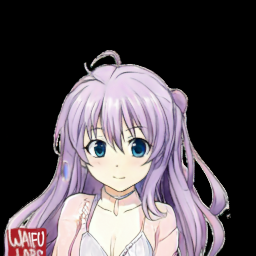

In [5]:
# Let's make a global Talking Head class to store the global vector
global img_anim
img_anim = Talking_Head(torch.device("cuda:0"), 0.6, automatic_EMA=True)

# Load in the new image
img_anim.load_new_image(img=deepcopy(img))

# Default pose for the image
img_anim.change_pose()

In [6]:
# Function to extract the word data from a mp3 file
def extract_word_data(filename):
    # Load in the model
    model_path = "vosk_models/vosk-model-small-en-us-0.15"
    model = Model(model_path)
    
    # Make the audio a wav file
    f = AudioSegment.from_mp3("tmp.mp3")
    f.export("tmp.wav", format="wav")
    
    # Read in the audio
    with wave.open("tmp.wav", "rb") as wf:
        # Prepare the model for rekognition
        rec = KaldiRecognizer(model, wf.getframerate())
        rec.SetWords(True)

        # get the list of JSON dictionaries
        results = []
        # recognize speech using vosk model
        data = wf.readframes(wf.getnframes())
        while len(data) > 0:
            if rec.AcceptWaveform(data):
                part_result = json.loads(rec.Result())
                results.append(part_result)
            data = wf.readframes(wf.getnframes())
        part_result = json.loads(rec.FinalResult())
        results.append(part_result)
    
    audio_trans = results[0]["result"]
    
    # Get the delay between each word
    for i in range(1, len(audio_trans)):
        audio_trans[i]["delay"] = audio_trans[i]["start"]-audio_trans[i-1]["end"]
    audio_trans[0]["delay"] = audio_trans[0]["start"]
    
    return audio_trans

In [7]:
# Literally all this function does is update the
# eye part of the vector every so often
global DONE
DONE = False
async def blink_loop():
    global img_anim
    
    # We want to iterate forever
    while not DONE:
        # Wait a little to blink again
        if img_anim.eye_cycle_end:
            # Blink anywhere between 2 and 7 secods with
            # a mean around 5 seconds (avg blink wait time)
            t = np.clip(np.random.normal(5, 1, size=1)[0], 2, 7)

            # Wait a little before blinking again
            time.sleep(t)
            img_anim.eye_cycle_end = False
        
        # Update the vector
        img_anim.Move_eyes()
        
        # Wait for a new frame to be generated
        while img_anim.eye_frame_disp == False:
            time.sleep(0.001)

# Used to make a thread running the blink loop
def run_blink_loop():
    loop = asyncio.new_event_loop()
    asyncio.set_event_loop(loop)

    loop.run_until_complete(blink_loop())
    loop.close()

In [8]:
async def talk_loop(filename):
    global img_anim
    global generating_mouth_movement
    
    # Get the audio transcript
    audio_trans = extract_word_data(filename)
    
    # Play the audio
    mixer.init()
    mixer.stop()
    mixer.music.unload()
    try:
        mixer.music.load('tmp.mp3')
        mixer.music.play()
    except pygame.error:
        s = mixer.Sound('tmp.mp3')
        s.play()
    
    # Iterate over all parts of the audio transcription
    generating_mouth_movement = True
    for part in audio_trans:
        # Get the beginning and end of the audio piece
        start = part["start"]
        end = part["end"]
        delay = part["delay"]
        
        # Wait for the next audio part according to the
        # delay in teh audio
        time.sleep(delay)
        
        # Get the entire audio clip length
        length = end-start
        
        # Setup the mouth movement cycle
        img_anim.setup_mouth_movement(length)
        
        # Iterate until the movement is done for this part
        while img_anim.mouth_cycle_end == False:
            # Update the vector
            img_anim.Move_mouth()
            
            # Wait for a new frame to be generated
            while img_anim.mouth_frame_disp == False:
                time.sleep(0.001)
                
    generating_mouth_movement = False
            
#             # Change the pose and show the image
#             img = img_anim.change_pose()
            
#             # End EMA timer and update EMA
#             if timer_s != -1:
#                 img_anim.update_EMA(time.time()-timer_s)
            
#             # Start timer for EMA
#             timer_s = time.time()
            
#             yield img
    
    
# Used to make a thread running the talk loop
def run_talk_loop(filename):
    loop = asyncio.new_event_loop()
    asyncio.set_event_loop(loop)

    loop.run_until_complete(talk_loop(filename))
    loop.close()

In [9]:
global generating_mouth_movement

def main():
    global img_anim
    global generating_mouth_movement
    
    # Quick calibration. Blink 10 times
    # and calibrate the time it takes
    # to show the image for the EMA
    for i in range(0, 10):
        s = time.time()
        img_anim.eye_cycle_end = False
        while img_anim.eye_cycle_end == False:
            img_anim.Move_eyes()
            img = img_anim.change_pose()
            img_anim.update_EMA(time.time()-s)
            s = time.time()
            yield img
    img_anim.eye_cycle_end = False
    
    # Start the blink loop
    b_thread = threading.Thread(target=run_blink_loop, args=())
    b_thread.start()
    
    # Start the mouth movement loop
    generating_mouth_movement = True
    m_thread = threading.Thread(target=run_talk_loop, args=("tmp.mp3",))
    m_thread.start()
    
    while True:
        # Wait until a new frame needs to be generated
        if generating_mouth_movement == True:
            if img_anim.mouth_frame_disp == False:
                # Change the pose and show the image
                img = img_anim.change_pose()

                yield img
        else:
            # Start the mouth movement loop
            # m_thread = threading.Thread(target=run_talk_loop, args=("tmp.mp3",))
            # m_thread.start()
            # generating_mouth_movement = True
            if img_anim.eye_frame_disp == False:
                # Change the pose and show the image
                img = img_anim.change_pose()

                yield img
        
        time.sleep(0.0001)
    
    global DONE
    DONE = True
    b_thread.join()
    m_thread.join()
    
#     m_thread = threading.Thread(target=run_mouth_loop, args=())
#     m_thread.start()
    
#     while True:
#         # If the mouth loop ended, reset it
#         if img_anim.mouth_cycle_end == True:
#             m_thread.join()
#             img_anim.setup_mouth_movement(1)
            
#             m_thread = threading.Thread(target=run_mouth_loop, args=())
#             m_thread.start()
        
#         # Change the pose and show the image
#         img = img_anim.change_pose()
#         yield img

In [10]:
io = gr.Interface(main, inputs=[], outputs=[gr.Image().style(height=330)])
io.queue().launch()

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
